1 加载数据

In [2]:
import pandas as pd

In [3]:
# 加载数据
data = pd.read_csv("mall_customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
'''
annual_income = 年收入
spending_score = 消费分数
'''

'\nannual_income = 年收入\nspending_score = 消费分数\n'

2 清洗数据，缺失值，异常值

In [5]:
# 数据描述
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# 数据行列
data.shape

(200, 5)

In [7]:
# 每一列数据类型
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# 提取纯数字数据
import numpy as np
df = data.select_dtypes(include=[np.number])
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


3 计算维度相关性

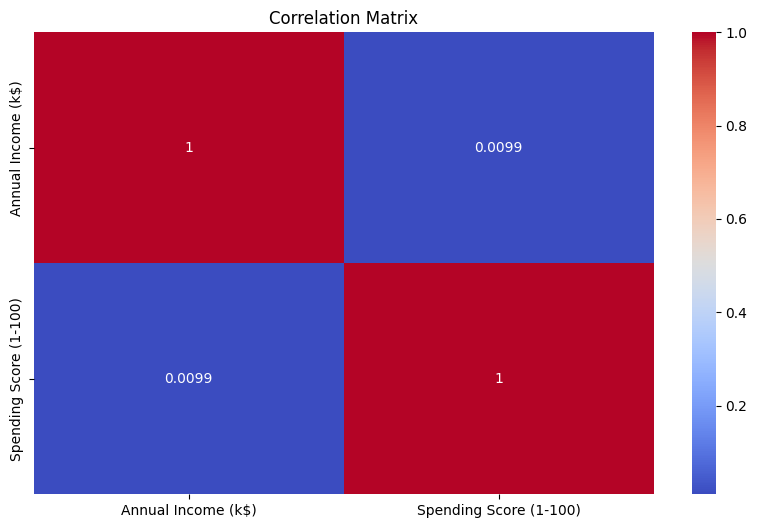

In [10]:
# 计算相关性
corr = df[['Annual Income (k$)', 'Spending Score (1-100)']].corr()

# 热度图查看维度相关性
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

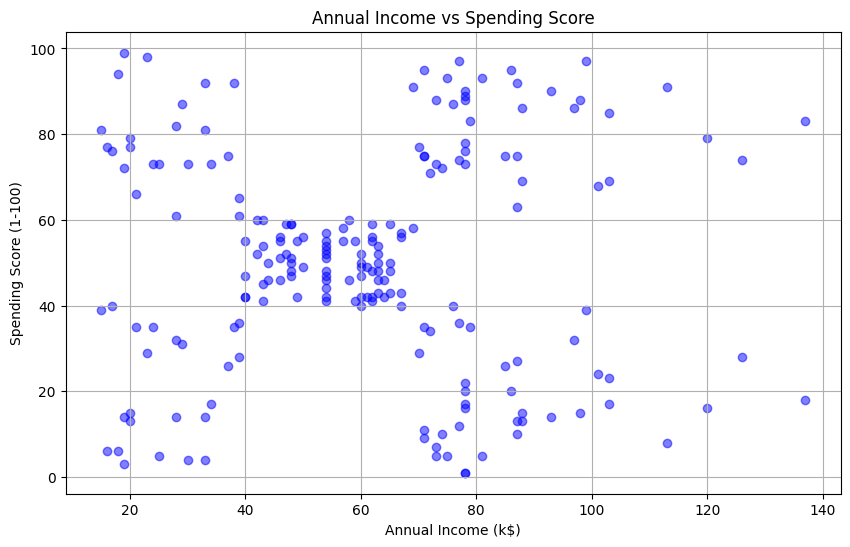

In [11]:
# 做出两列的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', alpha=0.5)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

4 切分 x 输入特征

In [12]:
# 需要的两个维度
x = df.iloc[:, [2,3]]

4 归一化

In [14]:
from sklearn import preprocessing
mean_std_scaler = preprocessing.StandardScaler() # 缩放器
scale_x = mean_std_scaler.fit_transform(x) # 缩放
scale_x
x = pd.DataFrame(scale_x, columns=x.columns) # array -> dataframe
x.describe()

,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


5 计算最佳k值

In [15]:
# 计算有多少个k，方法1
# 手肘法wcss
'''
紧凑度 = 内质心距离平方和 
越小越紧凑
当减少速度变慢时，就是最佳k值

'''
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0,n_init=10,max_iter=300)
    kmeans.fit(scale_x)
    wcss.append(kmeans.inertia_)
print(wcss)

[399.99999999999994, 269.29934286898697, 157.70400815035947, 108.92131661364357, 65.56840815571681, 55.11422576528423, 44.91118554999014, 37.14811697229111, 32.345837779566594, 29.178990420014017]


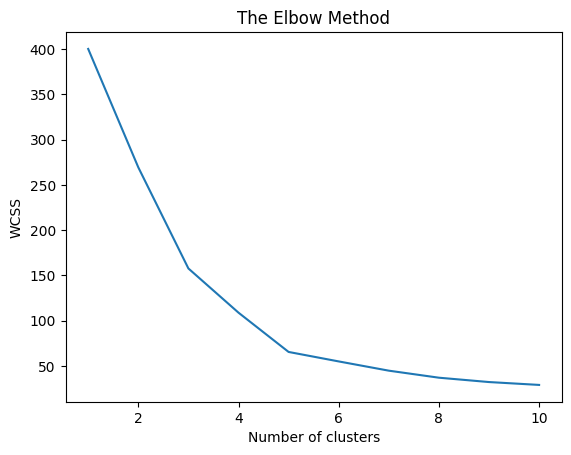

In [16]:
# 画图
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# 计算有多少个k，方法2
# 轮廓分数
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scale_x)

    silhouette_avg = silhouette_score(scale_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
print(silhouette_scores)

[np.float64(0.3797296572360151), np.float64(0.46658474419000145), np.float64(0.49434988482196784), np.float64(0.5539423799434205), np.float64(0.5431816061680774), np.float64(0.45385450194574106), np.float64(0.4538695700421118), np.float64(0.43366859054923906), np.float64(0.42409491002671823)]


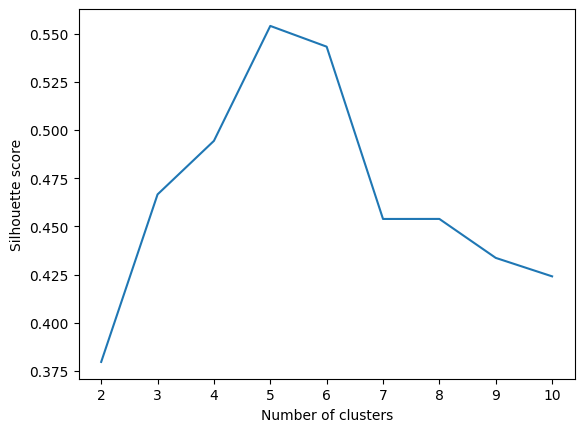

In [18]:
# 画图
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

6 训练

In [19]:
# 确认最佳k值后训练聚类模型
km = KMeans(n_clusters=5, init='k-means++', random_state=0,n_init=10,max_iter=300).fit(scale_x)

7 可视化

In [25]:
cluters = km.predict(x) # 预测结果
# 必须命名为label才能被作图识别
data['label'] = cluters # 分类结果 添加到原始数据中
data.head()

f:\a02_env_ware\py\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster,label
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,4
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,4,4
4,5,Female,31,17,40,3,3


In [26]:
# 将聚类中心坐标保存
centroids = pd.DataFrame(km.cluster_centers_, columns=['Annual Income (k$)','Spending Score (1-100)'])
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Annual Income (k$),Spending Score (1-100),cluster
0,-0.200913,-0.026456,Cluster 0
1,0.991583,1.239503,Cluster 1
2,1.055003,-1.284439,Cluster 2
3,-1.307519,-1.136965,Cluster 3
4,-1.329545,1.132178,Cluster 4


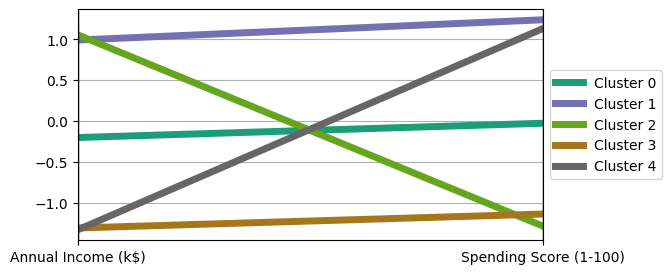

In [27]:
# 作图-平行坐标对应关系图
# 表明各个维度之间的关系
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(6,3))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

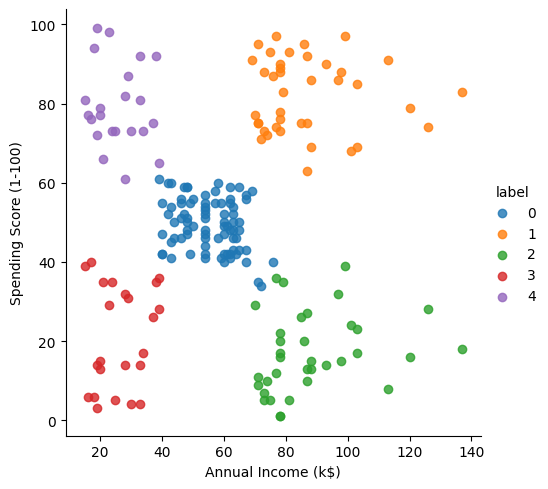

In [28]:
# 作图-散点图，并用5个类别区分
import seaborn as sns
sns.lmplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label', fit_reg=False,legend=True)